<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Воронка-событий" data-toc-modified-id="Воронка-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Воронка событий</a></span><ul class="toc-item"><li><span><a href="#Анализ-событий" data-toc-modified-id="Анализ-событий-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ событий</a></span></li><li><span><a href="#Воронка-событий" data-toc-modified-id="Воронка-событий-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Воронка событий</a></span></li></ul></li><li><span><a href="#Pезультаты-эксперимента" data-toc-modified-id="Pезультаты-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pезультаты эксперимента</a></span><ul class="toc-item"><li><span><a href="#Анализ-пользователей-по-группам" data-toc-modified-id="Анализ-пользователей-по-группам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ пользователей по группам</a></span><ul class="toc-item"><li><span><a href="#Функция-рассчета-значимой-разницы-между-тестируемыми-группами" data-toc-modified-id="Функция-рассчета-значимой-разницы-между-тестируемыми-группами-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Функция рассчета значимой разницы между тестируемыми группами</a></span></li><li><span><a href="#Учет-вероятности-ошибки-первого-рода" data-toc-modified-id="Учет-вероятности-ошибки-первого-рода-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Учет вероятности ошибки первого рода</a></span></li></ul></li><li><span><a href="#Проверка-гипотез-о-равенстве-долей" data-toc-modified-id="Проверка-гипотез-о-равенстве-долей-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка гипотез о равенстве долей</a></span><ul class="toc-item"><li><span><a href="#Сравнение-контрольных-групп-246-и-247" data-toc-modified-id="Сравнение-контрольных-групп-246-и-247-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Сравнение контрольных групп 246 и 247</a></span></li><li><span><a href="#Сравнение-групп-247-и-248" data-toc-modified-id="Сравнение-групп-247-и-248-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Сравнение групп 247 и 248</a></span></li><li><span><a href="#Сравнение-групп-246-и-248" data-toc-modified-id="Сравнение-групп-246-и-248-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Сравнение групп 246 и 248</a></span></li><li><span><a href="#Сравнение-объединенных-контрольных-групп-246/247-и-экспериментальной-248" data-toc-modified-id="Сравнение-объединенных-контрольных-групп-246/247-и-экспериментальной-248-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Сравнение объединенных контрольных групп 246/247 и экспериментальной 248</a></span></li></ul></li></ul></li><li><span><a href="#Результаты-и-выводы" data-toc-modified-id="Результаты-и-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Результаты и выводы</a></span></li></ul></div>

# Анализ поведения пользователей мобильного приложения стартапа продуктов питания.

***Цель:***  *Найти закономерности поведения пользователей мобильного приложения.*


Получены данные: 
 - файл с данными пользователей.

**Задачи:**
 - изучить воронку продаж,
 - проанализировать результаты А/A/B-эксперимента.
 
 Дизайнеры хотят поменять шрифты во всём приложении
 Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми.
 По результатам A/A/B-эксперимента нужно понять какой шрифт лучше.

## Знакомство с данными

In [1]:
# импортируем библиотеки
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import math as mth
from scipy import stats as st
import warnings # импортируем warnings, чтобы исключить предупреждения 
warnings.simplefilter("ignore")
%config InlineBackend.figure_format = 'retina'#добавляем графикам четкости

In [2]:
# читаем файлы с данными
df = pd.read_csv('logs_exp.csv',  sep ='\t')

In [3]:
def data_info(data):
    display(data.head(5))
    print()
    print('Информация о таблице:')
    print()
    print(data.info())
    print()

    if data.isna().sum().sum() == 0:
        print('Пропусков в данных нет')
    else:
        print('Количество пропусков по столбцам:')
        print(data.isna().sum())

In [4]:
data_info(df)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248



Информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

Пропусков в данных нет


Назвния столбцов следует привести к змеиному регистру.\
С типами данных придется поработать и привести их к удобному формату.\
Пропусков ни в данных нет.

## Предобработка данных

In [5]:
# приведем названия колонок к удобному формату  
df.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']

print(df.columns)

Index(['event_name', 'device_id_hash', 'event_timestamp', 'exp_id'], dtype='object')


Формат столбца `event_timestamp`, содержащий дату сейчас выглядит непонятно. Создадим новый столбец `date_time_event` в формате `datetime`, и еще один столбец просто с датой события.

Столбцы `device_id_hash` и `exp_id`  приведем к типу `str`, т.к. это не числовые данные,
а идентефикаторы.

In [6]:
# меняем формат данных даты на datetime, добавляя дополнительные столбцы
df['date_time_event'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['date_event'] = pd.to_datetime(df['date_time_event']).dt.date

# меняем формат данных id пользователей на строковый
df['device_id_hash'] = df['device_id_hash'].astype(str)
df['exp_id'] = df['exp_id'].astype(str)

In [7]:
# проверяем наличие дубликатов в данных
print('Количество дубликатов в таблице "df":', df.duplicated().sum())

Количество дубликатов в таблице "df": 413


В данные закралось 413 строк с дубликатами данных. Метод `.duplicated` считает дубликатами только полностью повторяющиеся строки. Быть может, страница обновилась, поэтому она посчиталась дважды В данном датасете таких строк всего 0,17%, удалим их.

In [8]:
# удалим дубликаты в данных и перезапишем индексы
df = df.drop_duplicates().reset_index(drop=True) 

## Исследовательский анализ

In [9]:
#посмотрим, какие бывают события
print('Количество уникальных событий:', df['event_name'].nunique())
print('Варианты событий:', df['event_name'].unique())

Количество уникальных событий: 5
Варианты событий: ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


Всего бывает 5 разных видов событий:
 * *MainScreenAppear* - главная страница;
 * *PaymentScreenSuccessful* - страница успешной оплаты;
 * *CartScreenAppear* - страница корзины товаров;
 * *OffersScreenAppear* - страница предложений;
 * *Tutorial* - страница обучения.

In [10]:
# просмотри сколько всего уникальных пользователей 
users_count_originally = df['device_id_hash'].nunique()
print('Количество уникальных пользователей:', users_count_originally)

Количество уникальных пользователей: 7551


In [11]:
# просмотри сколько всего уникальных событий в логе
event_count_originally = df.shape[0]
print('Количество событий:', event_count_originally)

Количество событий: 243713


In [12]:
# вычислим среднее количесвтвво событий на одного пользователя.
print('Среднее количество событий на одного пользователя:',
      round(df.groupby('device_id_hash').agg({'event_timestamp':'count'}).mean()[0], 2))
print('Медианное количество событий на одного пользователя:',
      round(df.groupby('device_id_hash').agg({'event_timestamp':'count'}).median()[0], 2))

Среднее количество событий на одного пользователя: 32.28
Медианное количество событий на одного пользователя: 20.0


В среднем на каджого пользователя приходится порядка 32 событий, тогда как медианное количество в 1,5 раза меньше, что говорит о большом количестве выбросов.

Выясним данными за какой период времени мы располагаем

In [13]:
date_min = df['date_event'].min()
date_max = df['date_event'].max()
print('Период исследования с {} по {}'.format(date_min, date_max))

Период исследования с 2019-07-25 по 2019-08-07


Построим таблицу распределения событий во времени

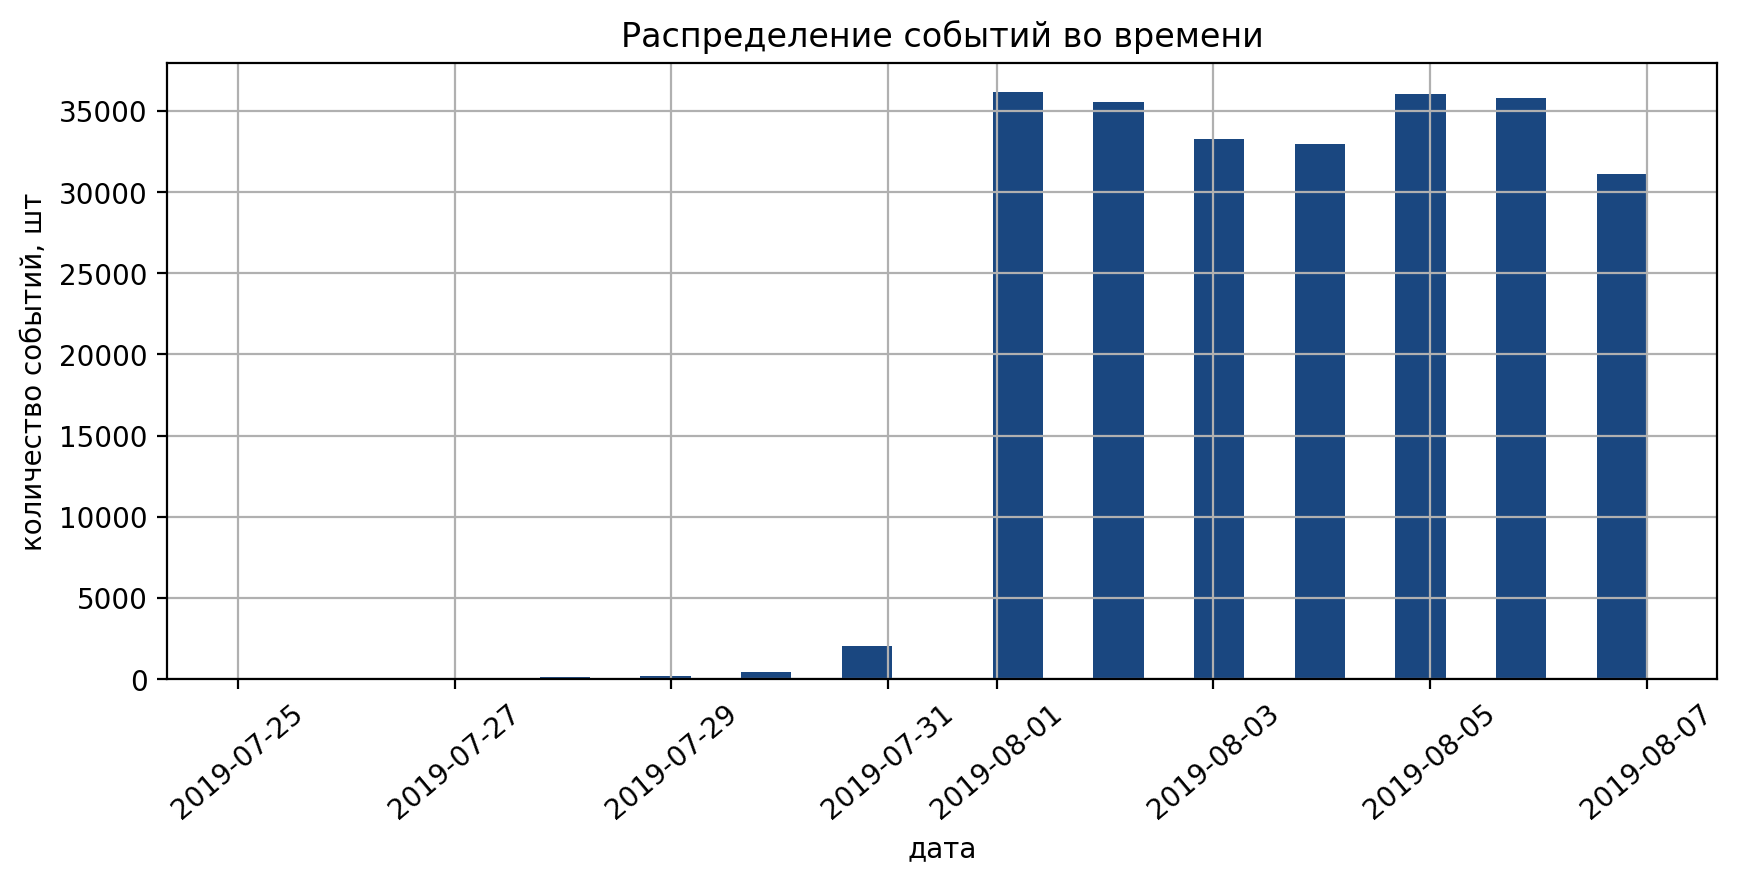

In [14]:
# построим график расроеделения событий по дням
df['date_event'].hist(bins = 28, figsize=(10,4), color = '#1A4780')
plt.xticks(rotation=40)
plt.title('Распределение событий во времени')
plt.xlabel ('дата')
plt.ylabel('количество событий, шт')
plt.show()

График распределения собыйтий во времени неравномерный. Так в июле количестно событий не превышает 2500, а с августа их количество варьирует в районе 3500.\
Оставим в логе только данные за август, потому что данные за июль нельзя назвать полноценными.

In [15]:
# зафиксируем соотношение экспериментальных групп до удаления данных за июль
display(df.groupby('exp_id').agg({'date_time_event':'count'}))

,date_time_event
exp_id,
246,80181
247,77950
248,85582


In [16]:
# удалим из лога данные за июль
df = df.loc[df['date_time_event'] >= '2019-08-01'].reset_index(drop = True)

In [17]:
# посмотрим сколько данных мы потеряли
print('Процент потерянных событий:', '{0:.2%}'.format(1-df.shape[0]/event_count_originally))
print('Процент потерянных пользователей:', '{0:.2%}'.format(1-df['device_id_hash'].nunique()/users_count_originally))

Процент потерянных событий: 1.16%
Процент потерянных пользователей: 0.23%


Удалив из датасета данные за июль мы потеряли 1,16% событий и 0,23% уникальных пользователей, что является допустимым.

In [18]:
# проверим изменилось ли соотношение экспериментальных групп после удаления данных за июль
display(df.groupby('exp_id').agg({'date_time_event':'count'}))

,date_time_event
exp_id,
246,79302
247,77022
248,84563


В логе остались данные по всем трем группам соотношения между ними изменились не сильно.

In [19]:
# проверяем наличие пользователей попавших в несколько групп
users_more_one_group = df.groupby('device_id_hash').agg({'exp_id' : 'nunique'}).query('exp_id>1')
users_more_one_group.shape[0]
print('Количество пользователей, попавших более чем в одну группу: {}'
      .format(users_more_one_group.shape[0]))

Количество пользователей, попавших более чем в одну группу: 0


Изначально данные в датасете были за период с 25 июля по 7 августа 2019 года. Однако при изучении распределения количества событий за день, выяснилось, что полноценными можно назвать только данные за август. В результате были удалены данные за июль, которые составляли всего 1,33% от всего количества событий. При этом соотношение между экспериментальными группами практически не изменилось.
Так же при проверке оказалось, что пользователи попавшие сразу в несколько групп отсутствуют.

## Воронка событий

### Анализ событий 

 Посмотрим, количество каждого из событий

In [20]:
# создадим таблицу видами событий и их количеством
events = (df.groupby('event_name')
          .agg({'date_time_event':'count'})
          .sort_values(by='date_time_event', ascending = False)
          .reset_index())
events.columns = ['event_name', 'count_event']

# добавим столбец с процентным количеством событий для каждого
events['per%'] = round(events['count_event']/(df.shape[0])*100, 2)

display(events)

,event_name,count_event,per%
0,MainScreenAppear,117328,48.71
1,OffersScreenAppear,46333,19.23
2,CartScreenAppear,42303,17.56
3,PaymentScreenSuccessful,33918,14.08
4,Tutorial,1005,0.42


Почти половина всех действий в данных это посещение главной страницы.
Меньше всего (менее 1%) пользователи посещают страницу обучения, вероятно, она является не обязательной и пользователи могут пропустить её.

Посмотрим сколько уникальных пользователей совершали каждое из действий.

In [21]:
# создадим таблицу с количеством уникальных пользльзователей для каждого события
visitors = (df.groupby('event_name')
            .agg({'device_id_hash':'nunique'})
            .sort_values(by='device_id_hash', ascending = False)
            .reset_index())
visitors.columns = ['event_name', 'count_visitors']

# лобавит столбец с процентным отнощеним пользователей
visitors['per%'] = round(visitors['count_visitors']/(df['device_id_hash'].nunique())*100, 2)

display(visitors)

,event_name,count_visitors,per%
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


Практически все пользователи оказываются на главное странице и только 11,15% посещают страницу обучения. Около 60% хоть раз посещали страницу предложений и половина хоть раз оказывалась на страницах оплаты.

Стоит предоложить, что изначально пользователи попадают на главную страницу `MainScreenAppear`, затем просматривают предложения на `OffersScreenAppear`, следующим шагом является ввод данных для оплаты на `CartScreenAppear`, в самом конце пользователи видят страницу успешной оплаты `PaymentScreenSuccessful`.

Так как в пути пользователя на сайте нет обязательного посещения страницы обучения, далее учитывать его при построении воронки пользователей не будем.

In [22]:
# удалим из таблицы пользователей посетивших страницу Tutorial
visitors = visitors[visitors['event_name'] != 'Tutorial']

### Воронка событий 

Визуализируем воронку событий, для этого создадим два столбца новых столбца в таблице `visitors`

In [23]:
# добавим колонку воронки отношением к первому шагу
visitors['funnel_all%'] = round(visitors['count_visitors']/(visitors['count_visitors'][0])*100, 2)

# создадим столбец конверсии пользователей в шаг
for i in visitors.index:
    if i == 0:
        visitors.loc[i, 'funnel%'] = round(visitors.loc[i,'count_visitors']
                                      /visitors.loc[i,'count_visitors']*100, 2)
    else:
        visitors.loc[i, 'funnel%'] = round(visitors.loc[i,'count_visitors']
                                           /visitors.loc[i-1,'count_visitors']*100, 2)
display(visitors)

,event_name,count_visitors,per%,funnel_all%,funnel%
0,MainScreenAppear,7419,98.47,100.00,100.00
1,OffersScreenAppear,4593,60.96,61.91,61.91
2,CartScreenAppear,3734,49.56,50.33,81.30
3,PaymentScreenSuccessful,3539,46.97,47.70,94.78


In [24]:
# построим диаграмму воронки
fig = px.funnel(df, x = visitors['funnel_all%'], y = visitors['event_name'], title = "Диаграмма воронки")
fig.show() 

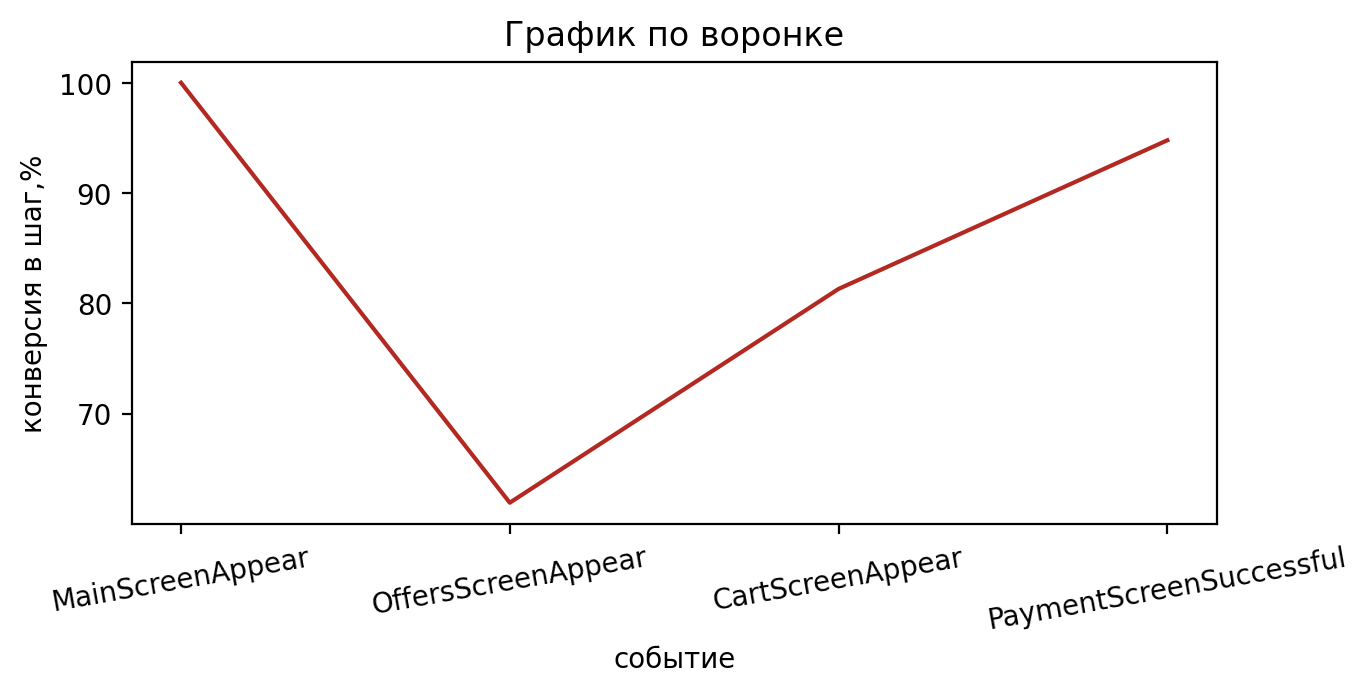

In [25]:
# построим график пользователей в шаг
plt.figure(figsize=[7, 3])
plt.plot(visitors['event_name'], visitors['funnel%'], color = '#B32821')
plt.xticks(rotation=10)
plt.title('График по воронке')
plt.xlabel ('событие')
plt.ylabel('конверсия в шаг,%')
plt.show()

По графикам видно, что большинство пользователей теряется при переходе с главной страницы на страницу предложений. От предложений до оплаты не доходят только 20% пользоватлей, а 5% теряются при оплате. 
Только 47,7% пользователей доходит от первого события до оплаты.

 ## Pезультаты эксперимента

 ### Анализ пользователей по группам

Для начала посмотрим как на каждое событие распределяются пользователи каждой из групп

In [26]:
# создадим таблицу с суммарным количеством пользователей в каждой группе
group_count = (df.groupby('exp_id').agg({'device_id_hash':'nunique'}).reset_index())
group_count.columns = ['exp_id', 'user_count']
# создадим таблицу с количеством уникальных пользователей для каждого события
group_table_users = (df.pivot_table(index = 'exp_id',
                             columns = 'event_name',
                             values = 'device_id_hash',
                             aggfunc = 'nunique')
                    .drop(columns='Tutorial')
                    .reset_index())
# объединим две таблицы выше
group_table_users = group_table_users.merge(group_count, on = 'exp_id')
display(group_table_users)

,exp_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,user_count
0,246,1266,2450,1542,1200,2484
1,247,1238,2476,1520,1158,2513
2,248,1230,2493,1531,1181,2537


Количество пользователей в каждом событии каждой из групп одного порядка

#### Функция рассчета значимой разницы между тестируемыми группами

In [27]:
# задаем функцию, которая 
def z_criteria(count, test, alpha): # передаем общее количество пользователей и тестовые группы
    for name, values in test.iteritems():
        # пропорция успехов в первой группе
        p1 = values[0]/count[0]
        
        # пропорция успехов во второй группе
        p2 = values[1]/count[1] 
        
        # пропорция успехов в комбинированном датасете
        p_combined = (values[0] + values[1]) / (count[0] + count[1])
        
        # разница пропорций в датасетах
        difference = p1 - p2
        
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/count[0] + 1/count[1]))
        
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)
        
        # рассчитываем p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        # выводим результат
        print('Для события {} '.format(name))
        print('p-значение: ', p_value)
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
        print('')

#### Учет вероятности ошибки первого рода

Примем уровень значимости 0.05.

С каждой новой проверкой гипотезы растёт вероятность ошибки первого рода. 

Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют разные методы корректировки уровня значимости.

В данной рабботе будем применять ***Метод Шидака***:

*1 - (1 - 0.05)^(1/m)*

Количество сравнений - 16, поэтому параметр m формулы равняется 16

In [28]:
# расчитываем alpha по формуле метода Шидака
alpha = 1 - (1 - 0.05)**(1/16)
print('alpha =', round(alpha, 4))

alpha = 0.0032


 ### Проверка гипотез о равенстве долей

 #### Сравнение контрольных групп 246 и 247

Проверим равенство долей двух контрольных групп, для этого следует подготовить наши данные для функции 


In [29]:
# создаем таблицу количества пользователей первых двух групп
count_1= group_table_users.query('exp_id != "248"')
count_1= count_1['user_count']

# создаем таблицу событий количества пользователей первых двух групп
test_1 = group_table_users.query('exp_id != "248"').drop(columns=['exp_id','user_count'])  


Сформулируем единые гопотезы для проверки равенства долей кортрольных групп для всех событий:
```
H_0: Доля группы 246 = Доля группы 247`
H_1: Доля группы 246 ≠ Доля группы 247`

alpha = 0.0032
```

In [30]:
print('Сравнение групп 246 и 247:')
print('')
# применяем функцию
z_criteria(count_1, test_1, alpha)

Сравнение групп 246 и 247:

Для события CartScreenAppear 
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события MainScreenAppear 
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события OffersScreenAppear 
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события PaymentScreenSuccessful 
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



В результате проверки ни для одного события не оказалось оснований считать доли контрольных групп разными. Разбиение пользователей на группы работает корректно.

 #### Сравнение групп 247 и 248

Теперь сравним контрольную группу с экспериментальной

In [31]:
# создаем таблицу количества пользователей двух групп
count_2= group_table_users.query('exp_id != "246"')
count_2= count_2['user_count'].reset_index(drop=True) 

# создаем таблицу событий количества пользователей двух групп
test_2 = (group_table_users.query('exp_id != "246"')
          .drop(columns=['exp_id','user_count']).reset_index(drop=True))

Сформулируем единые гопотезы для проверки равенства долей кортрольных групп для всех событий:
```
H_0: Доля группы 247 = Доля группы 248`
H_1: Доля группы 247 ≠ Доля группы 248`

alpha = 0.0032
```

In [32]:
print('Сравнение групп 247 и 248:')
print('')
# применяем функцию
z_criteria(count_2, test_2, alpha)

Сравнение групп 247 и 248:

Для события CartScreenAppear 
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события MainScreenAppear 
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события OffersScreenAppear 
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события PaymentScreenSuccessful 
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



В результате проверки ни для одного события не оказалось оснований считать доли групп разными. Разбиение пользователей на группы работает корректно.

 #### Сравнение групп 246 и 248

In [33]:
# создаем таблицу количества пользователей двух групп
count_3= group_table_users.query('exp_id != "247"')
count_3= count_3['user_count'].reset_index(drop=True) 

# создаем таблицу событий количества пользователей двух групп
test_3 = (group_table_users.query('exp_id != "247"')
          .drop(columns=['exp_id','user_count']).reset_index(drop=True))

Сформулируем единые гопотезы для проверки равенства долей кортрольных групп для всех событий:
```
H_0: Доля группы 246 = Доля группы 248`
H_1: Доля группы 246 ≠ Доля группы 248`

alpha = 0.0032
```

In [34]:
print('Сравнение групп 246 и 248:')
print('')
# применяем функцию
z_criteria(count_3, test_3, alpha)

Сравнение групп 246 и 248:

Для события CartScreenAppear 
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события MainScreenAppear 
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события OffersScreenAppear 
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события PaymentScreenSuccessful 
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



В результате проверки ни для одного события не оказалось оснований считать доли групп разными. Разбиение пользователей на группы работает корректно.

 #### Сравнение объединенных контрольных групп 246/247 и экспериментальной 248

Объединим контрольные группы и сравним доли контрольных групп с экспериментальными 

In [35]:
#создадим строку с суммарным количеством уникальных пользователей двух контрольных групп
sum_aa_group = group_table_users.query('exp_id != "248"').sum(axis=0)

# объединяем с таблицей уникальных пользователей по событиям и группам
test_4 = group_table_users.append(sum_aa_group, ignore_index = True )

# создаем таблицу количества пользователей двух групп
count_4= test_4.query('exp_id != "247"and exp_id != "246"')
count_4= count_4['user_count'].reset_index(drop=True)

# создаем таблицу событий количества пользователей двух групп
test_4 = (test_4.query('exp_id != "247" and exp_id != "246"')
          .drop(columns=['exp_id','user_count']).reset_index(drop=True))

Сформулируем единые гопотезы для проверки равенства долей кортрольных групп для всех событий:
```
H_0: Доля группы 246/247 = Доля группы 248`
H_1: Доля группы 246/247 ≠ Доля группы 248`

alpha = 0.0032
```

In [36]:
print('Сравнение групп 246/247 и 248:')
print('')
# применяем функцию
z_criteria(count_4, test_4, alpha)

Сравнение групп 246/247 и 248:

Для события CartScreenAppear 
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события MainScreenAppear 
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события OffersScreenAppear 
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события PaymentScreenSuccessful 
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Даже при объединении контрольных групп в результате проверки ни для одного события не оказалось оснований считать доли групп разными. Разбиение пользователей на группы работает корректно.

 ## Результаты и выводы

**Результаты:**

1. В датасете были данные за период с 25 июля по 7 августа 2019 года. Однако полноценными были приняты только данные за август.

2. Почти половина всех действий в данных это посещение главной страницы. Меньше всего (менее 1%) пользователи посещают страницу обучения, вероятно, она является не обязательной и пользователи могут пропустить её.


3. Определен путь пользователей в приложении:
     - главная страница `MainScreenAppear`,
     - затем предложения приложения на `OffersScreenAppear`,
     - следующим шагом является ввод данных для оплаты на `CartScreenAppear`, 
     - в самом конце пользователи видят страницу успешной оплаты `PaymentScreenSuccessful`.
     


4. Большинство пользователей теряется при переходе с главной страницы на страницу предложений. Только 47,7% пользователей доходит от первого события до оплаты.


5. В результате многочисленного сравнения контрольных и экспериментальной групп ни для одного события не оказалось оснований считать их доли разными.

**Вывод:**
При анализе воронки продаж было выявлено, что почти 40% пользователей теряется на первом шаге. Однако при сравнении долей контрольных групп их различий выявленно не было. Очевидно, что закономерность воронки для кажлой из групп не изменится. Следует предположить, что смена шрифта никаким образом не повлияет на конверсию пользователей в шаг.